In [16]:
import tensorflow as tf

In [17]:
from keras.datasets import mnist

In [18]:
from matplotlib import pyplot

In [19]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [20]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


In [21]:

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [22]:
x_train=x_train.reshape(-1,784)
x_test=x_test.reshape(-1,784)
x_train.astype('float32')
x_test.astype('float32')

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [23]:
x_train=x_train/255
x_test=x_test/255

In [24]:
import numpy as np
from keras.utils import np_utils
n_classes=10
y_train=np_utils.to_categorical(y_train,n_classes)
y_test=np_utils.to_categorical(y_test,n_classes)

In [25]:

model = Sequential()

In [12]:
from keras.layers import Dense, Activation, Input, Dropout
model.add( Dense( 512, input_shape = (784,) ) )
model.add( Activation('relu') )
model.add( Dropout(0.2) )
model.add( Dense( 512 ) )
model.add( Activation('relu') )
model.add( Dropout(0.2) )
model.add( Dense( 10 ) )
model.add( Activation('softmax') )

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [14]:
model.compile( optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'] )

In [15]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

NameError: ignored

In [24]:
model.fit(x_train, y_train,epochs=20,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 32s 536us/step - loss: 0.2549 - accuracy: 0.9231 - val_loss: 0.1306 - val_accuracy: 0.9600
Epoch 2/20
60000/60000 [==============================] - 32s 528us/step - loss: 0.1584 - accuracy: 0.9528 - val_loss: 0.1596 - val_accuracy: 0.9563
Epoch 3/20
60000/60000 [==============================] - 32s 526us/step - loss: 0.1441 - accuracy: 0.9583 - val_loss: 0.1246 - val_accuracy: 0.9622
Epoch 4/20
60000/60000 [==============================] - 31s 524us/step - loss: 0.1364 - accuracy: 0.9602 - val_loss: 0.1252 - val_accuracy: 0.9647
Epoch 5/20
60000/60000 [==============================] - 32s 531us/step - loss: 0.1206 - accuracy: 0.9668 - val_loss: 0.1374 - val_accuracy: 0.9633
Epoch 6/20
60000/60000 [==============================] - 32s 527us/step - loss: 0.1264 - accuracy: 0.9651 - val_loss: 0.1117 - val_accuracy: 0.9679
Epoch 7/20
60000/60000 [==============================] 

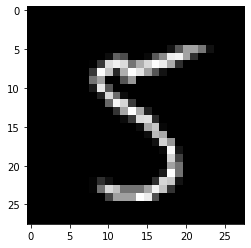

In [32]:
import matplotlib.pyplot as plt
idx = np.random.choice( x_test.shape[0] )
cur_img = x_test[idx]
img = cur_img.reshape( (28,28) )
plt.imshow( img, cmap='gray' )
plt.show()

In [33]:
cur_img = np.reshape(cur_img,(1,-1))
print(cur_img.shape)
ans = model.predict( cur_img )
res = ans[0].argmax()
print ("Result :", res)
print ("Confidence:", 100*ans[0][res])

(1, 784)
Result : 5
Confidence: 100.0


In [65]:
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.datasets import mnist

In [66]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape(X_train.shape[0], 28, 28,1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28,1).astype('float32')

In [67]:
# normalize inputs from 0-255 to 0-1
from keras.utils import np_utils
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [68]:
  model = Sequential()


In [69]:
model.add(Conv2D(32, (5, 5), input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [70]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 592,074
Trainable params: 592,074
Non-trainable params: 0
________________________________________________

In [71]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [72]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(60000, 28, 28, 1) (60000, 10) (10000, 28, 28, 1) (10000, 10)


In [73]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 29s - loss: 0.2427 - accuracy: 0.9301 - val_loss: 0.0739 - val_accuracy: 0.9772
Epoch 2/10
 - 29s - loss: 0.0730 - accuracy: 0.9789 - val_loss: 0.0543 - val_accuracy: 0.9824
Epoch 3/10
 - 29s - loss: 0.0547 - accuracy: 0.9835 - val_loss: 0.0438 - val_accuracy: 0.9851
Epoch 4/10
 - 29s - loss: 0.0425 - accuracy: 0.9868 - val_loss: 0.0430 - val_accuracy: 0.9853
Epoch 5/10
 - 29s - loss: 0.0347 - accuracy: 0.9892 - val_loss: 0.0376 - val_accuracy: 0.9869
Epoch 6/10
 - 28s - loss: 0.0300 - accuracy: 0.9902 - val_loss: 0.0371 - val_accuracy: 0.9878
Epoch 7/10
 - 28s - loss: 0.0244 - accuracy: 0.9923 - val_loss: 0.0344 - val_accuracy: 0.9880
Epoch 8/10
 - 28s - loss: 0.0205 - accuracy: 0.9933 - val_loss: 0.0385 - val_accuracy: 0.9882
Epoch 9/10
 - 28s - loss: 0.0176 - accuracy: 0.9942 - val_loss: 0.0337 - val_accuracy: 0.9893
Epoch 10/10
 - 28s - loss: 0.0166 - accuracy: 0.9947 - val_loss: 0.0355 - val_accuracy: 0.9887


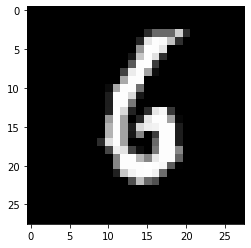

In [74]:
import matplotlib.pyplot as plt
idx = np.random.choice( X_test.shape[0] )
cur_img = X_test[idx]
img=cur_img.reshape((28,28))
plt.imshow( img, cmap='gray' )
plt.show()

In [78]:
cur_img=np.reshape(cur_img,(1,28,28,1))
print(cur_img.shape)
ans = model.predict( cur_img )
res = ans[0].argmax()
print ("Result :", res)
print ("Confidence:", 100*ans[0][res])

(1, 28, 28, 1)
Result : 6
Confidence: 99.99997615814209
